# NaiveBayes

In [1]:
import numpy as np
import pandas as pd
from plotnine import *
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def procesar_csv(df):
    from sklearn import preprocessing
    # convertirmos las columnas origin y destination a variables numericas 
    le = preprocessing.LabelEncoder()
    origin_as_int = le.fit_transform(df['origin'])
    destination_as_int = le.fit_transform(df["destination"])
    
    #df["origin_int"] = origin_as_int
    df.drop('origin', axis=1, inplace=True)
    
    #df["destination_int"] = origin_as_int
    df.drop('destination', axis=1, inplace=True)

    # Cambiamos el formato del tiempo a unix time stamp para medir la distancia de forma mas facil.
    df["date_departure_int"] = np.log10(pd.to_datetime(df["date"].map(str)+" "+df["departure_time"]).apply(lambda x: x.value))
    df.drop('departure_time', axis=1, inplace=True)
    df.drop('date', axis=1, inplace=True)
    # retornamos el data frame modificado sin valore nulos.
    return df.dropna()

In [2]:
# Leemos los datos
df = pd.read_csv("ALUMNOS-trainData.csv")
# Procesamos los datos con la funcion procesar_csv()
df = procesar_csv(df)
# transformamos los datos a binarios
df["Labels"] = np.where(df["noshow"] >= 4, 1,0)
# Definimos nuestra columna target
target = df['Labels']
# La eliminamos del dataframe

df.columns

C:\Users\matia\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10


Index(['Unnamed: 0', 'fligth_number', 'distance', 'noshow', 'denied_boarding',
       'pax_midlow', 'pax_high', 'pax_midhigh', 'pax_low', 'pax_freqflyer',
       'group_bookings', 'out_of_stock', 'dom_cnx', 'int_cnx', 'p2p',
       'capacity', 'revenues_usd', 'bookings', 'date_departure_int', 'Labels'],
      dtype='object')

In [5]:
df
#df.info()

,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings,date_departure_int,Labels
0,389083,8995,1394,9.0,0,94,2,28,94,22,19,0,1,0,239,174.0,10631.1,240,18.099599,1
1,177073,7061,489,0.0,0,100,4,4,87,25,0,0,19,9,192,174.0,5453.7,220,18.094508,0
2,1040357,8972,2180,4.0,0,7,1,5,64,2,0,0,0,10,69,218.0,16161.0,79,18.115589,1
3,505258,6039,524,13.0,0,54,4,7,21,4,0,0,26,0,64,174.0,10828.7,90,18.102437,1
4,369663,7713,1170,14.0,0,21,88,18,82,0,88,1,23,3,183,144.0,16721.6,209,18.099124,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,359783,6024,552,5.0,0,25,12,20,4,12,0,0,64,9,0,144.0,14102.1,73,18.098888,1
999886,152315,6669,3934,4.0,0,129,3,19,121,2,20,0,0,118,156,168.0,32907.8,274,18.093891,1
999887,1000747,9094,1430,5.0,0,2,1,0,108,20,36,0,7,0,124,218.0,13519.3,131,18.114587,1
999888,117952,7704,1091,2.0,0,67,2,7,42,16,0,0,34,2,98,144.0,8729.6,134,18.093013,0


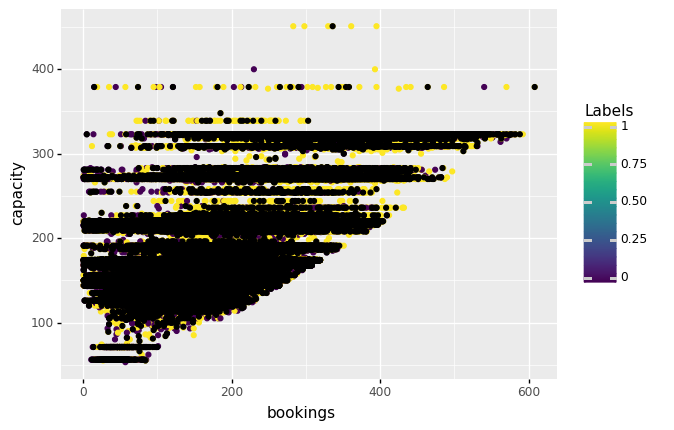

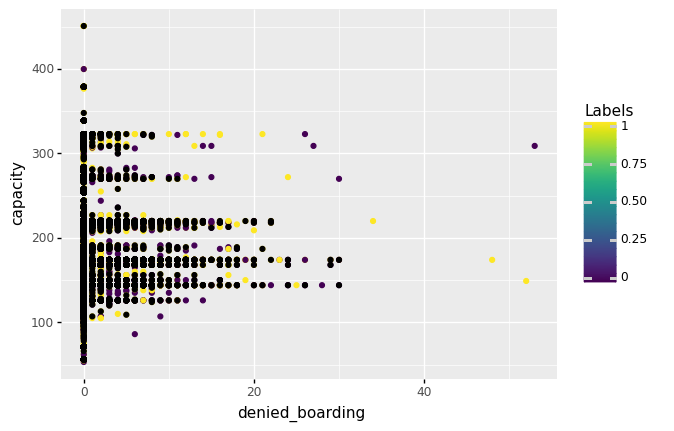

In [4]:
from sklearn.model_selection import train_test_split
# Dividimos los data frames en test y train set
X_train, X_test, y_train, y_test = train_test_split(df,target, test_size=0.33,random_state=42)

testData=pd.DataFrame(X_test,columns=df.columns)
testData["Labels"]=y_test
print(ggplot(df)+aes(x="bookings", y="capacity",color="Labels")+ geom_point()+geom_point(data=testData,color="black"))

print(ggplot(df)+aes(x="denied_boarding", y="capacity",color="Labels")
 +geom_point()+geom_point(data=testData,color="black"))

In [5]:
y_test.value_counts()

1    216042
0    113454
Name: Labels, dtype: int64

In [6]:
#Creando un objeto Naive Bayes con las condiciones iniciales
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB = NB.fit(X_train,y_train)

#Aplicando el modelo a otros datos
resultado=NB.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

#Aplicando el modelo a otros datos
resultado=NB.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado)

Resultado de la predicción:
 [1 1 0 ... 0 0 1]
Resultado original:
 118754    1
557683    1
920464    0
342002    1
795703    0
         ..
437790    1
21087     1
772657    0
276786    0
447843    1
Name: Labels, Length: 329496, dtype: int32
Resultado de la predicción:
 [[1.02325548e-52 1.00000000e+00]
 [7.47200107e-53 1.00000000e+00]
 [1.00000000e+00 8.85129827e-52]
 ...
 [1.00000000e+00 8.69746302e-52]
 [1.00000000e+00 2.78558216e-52]
 [1.36939978e-53 1.00000000e+00]]


In [7]:
resultado

array([[1.02325548e-52, 1.00000000e+00],
       [7.47200107e-53, 1.00000000e+00],
       [1.00000000e+00, 8.85129827e-52],
       ...,
       [1.00000000e+00, 8.69746302e-52],
       [1.00000000e+00, 2.78558216e-52],
       [1.36939978e-53, 1.00000000e+00]])

In [8]:
print("Clases:\n",target)
print("características:\n",df.columns)
print("\nDistribución a prior (P(C)):\n",NB.class_prior_)
print("\nMedias:\n",NB.theta_)
print("\nDesviación estandar (sqrt de sigma):\n",np.sqrt(NB.sigma_))

Clases:
 0         1
1         0
2         1
3         1
4         1
         ..
999885    1
999886    1
999887    1
999888    0
999889    1
Name: Labels, Length: 998472, dtype: int32
características:
 Index(['fligth_number', 'distance', 'denied_boarding', 'pax_midlow',
       'pax_high', 'pax_midhigh', 'pax_low', 'pax_freqflyer', 'group_bookings',
       'out_of_stock', 'dom_cnx', 'int_cnx', 'p2p', 'capacity', 'bookings',
       'Labels'],
      dtype='object')

Distribución a prior (P(C)):
 [0.34448321 0.65551679]

Medias:
 [[5.82191942e+03 1.47606202e+03 6.30589583e-02 7.38713306e+01
  3.78970801e+00 6.04682991e+00 5.11962543e+01 1.58840665e+01
  4.97485366e+00 9.88843615e-02 2.55039943e+01 2.97408213e+01
  9.55433736e+01 1.72642640e+02 1.50788189e+02 0.00000000e+00]
 [6.26479195e+03 1.45397872e+03 3.90468046e-02 7.63725512e+01
  3.82651160e+00 6.47302434e+00 6.04029554e+01 1.72695810e+01
  3.22839519e+00 9.47243601e-02 2.59631059e+01 2.51640864e+01
  1.13217431e+02 1.80960970e+02 1

C:\Users\matia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.


In [9]:
from sklearn import metrics as mt
# Evaluacion:
accuracy = mt.accuracy_score(y_test, resultado)

precicion_para_cero = mt.precision_score(y_test==0,resultado==0,pos_label=1,average="binary")
precicion_para_uno = mt.precision_score(y_test == 1, resultado == 1, pos_label=1, average="binary")

lista = mt.precision_score(y_test,resultado,labels=[0,1],average=None)

recall_score = mt.recall_score(y_test, resultado, labels=None, pos_label=1, average = 'binary')

f1_score = mt.f1_score(y_test, resultado, labels=None, pos_label=1, average = 'binary')

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precicion para 0: {precicion_para_cero}")
print(f"Precicion para 1: {precicion_para_uno}")
print(f"Recall score: {recall_score}")
print(f"f1 Score: {f1_score}")